In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sys

sys.path.append("../EDA")
DATA_PATH = "../instruction/movieReplicationSet.csv"
ALPHA = 0.005

import movie_data_formatter as mdf
import movie_rating_gender as mrgy
import general_functions as gf

df = pd.read_csv(DATA_PATH)
df = mdf.clean_data(df)
processed_data = mdf.convert_to_table(df)
processed_data = mrgy.reformat_gender_identity(processed_data)

shrek_df = processed_data[(processed_data['movie_name'] == 'Shrek') & (processed_data['year'] == '2001')]
df_gender = shrek_df[shrek_df['gender_identity'].isin(['Male', 'Female'])].dropna(subset=['rating'])
male_ratings = df_gender[df_gender['gender_identity'] == 'Male']
female_ratings = df_gender[df_gender['gender_identity'] == 'Female']


# Question 3
Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?

Since the Non-binary group has only 6 participants, it’s too small for reliable inference and should be excluded from this test.

In [27]:
shrek_df['gender_identity'].value_counts()

gender_identity
Male          807
Female        260
Non-binary      6
Name: count, dtype: int64

In [28]:
# after removing na
df_gender['gender_identity'].value_counts()

gender_identity
Male      743
Female    241
Name: count, dtype: int64

In [29]:
male_ratings["rating"].describe()

count    743.000000
mean       3.155451
std        0.906547
min        0.000000
25%        2.500000
50%        3.500000
75%        4.000000
max        4.000000
Name: rating, dtype: float64

In [30]:
female_ratings["rating"].describe()

count    241.000000
mean       3.082988
std        0.824975
min        0.500000
25%        2.500000
50%        3.000000
75%        4.000000
max        4.000000
Name: rating, dtype: float64

/Users/paolacalle/Desktop/NYU/semesters/fall-2025/ds/projects/movie-ratings-replication/problem_set/../EDA/movie_rating_gender.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender_identity', y='rating', data=shrek_df, palette='Set2')


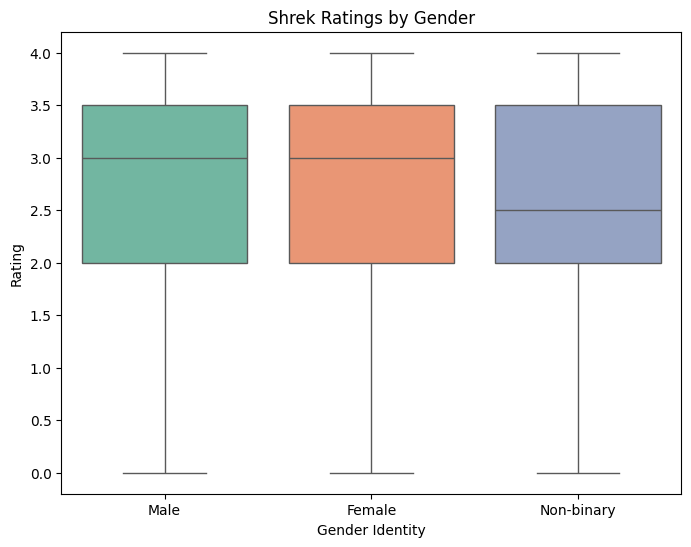

<module 'matplotlib.pyplot' from '/Users/paolacalle/Desktop/NYU/semesters/fall-2025/ds/projects/movie-ratings-replication/my_project_env/lib/python3.13/site-packages/matplotlib/pyplot.py'>

In [3]:
mrgy.plot_shrek_by_gender(processed_data, show=True)

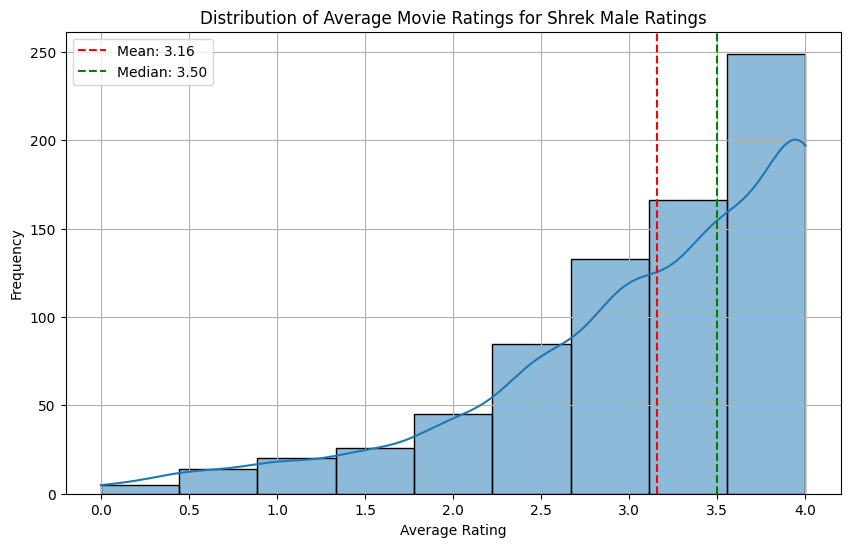

<module 'matplotlib.pyplot' from '/Users/paolacalle/Desktop/NYU/semesters/fall-2025/ds/projects/movie-ratings-replication/my_project_env/lib/python3.13/site-packages/matplotlib/pyplot.py'>

In [31]:
gf.plot_distrubtion(male_ratings, "Shrek Male Ratings", y='rating', show=True, bins=9)

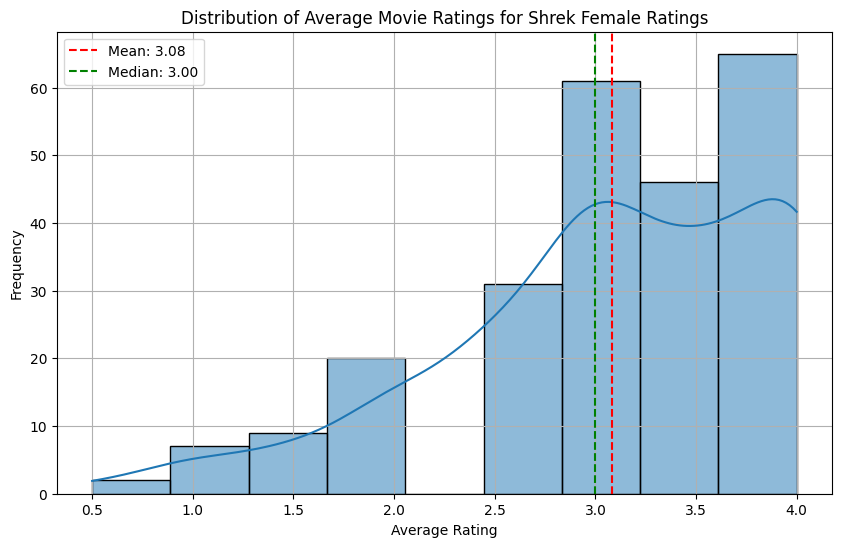

<module 'matplotlib.pyplot' from '/Users/paolacalle/Desktop/NYU/semesters/fall-2025/ds/projects/movie-ratings-replication/my_project_env/lib/python3.13/site-packages/matplotlib/pyplot.py'>

In [32]:
gf.plot_distrubtion(female_ratings, "Shrek Female Ratings", y='rating', show=True, bins=9)

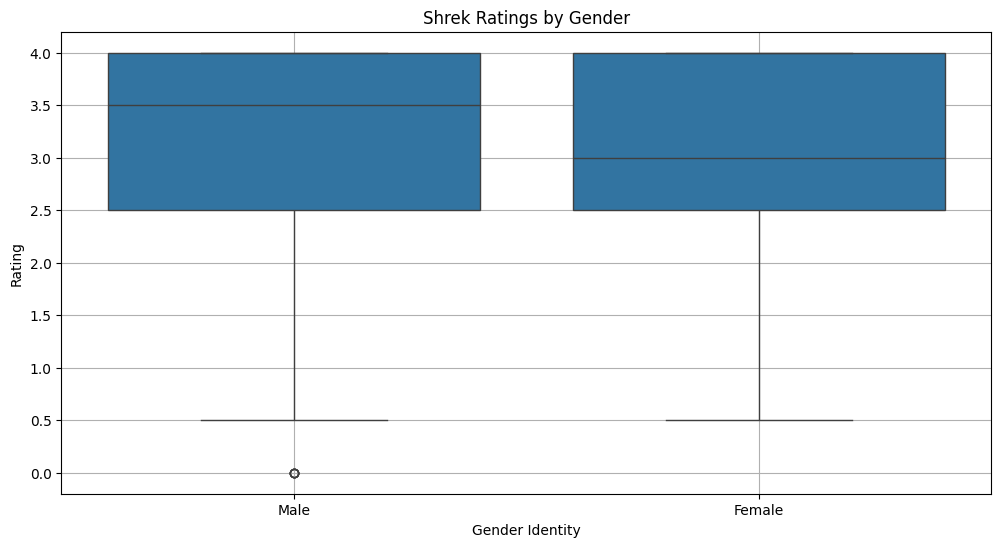

<module 'matplotlib.pyplot' from '/Users/paolacalle/Desktop/NYU/semesters/fall-2025/ds/projects/movie-ratings-replication/my_project_env/lib/python3.13/site-packages/matplotlib/pyplot.py'>

In [34]:
gf.plot_boxplot(df_gender, x='gender_identity', y='rating', title='Shrek Ratings by Gender', xlabel='Gender Identity', ylabel='Rating', show=True)

# Hypotheses
We compared the ratings of male (n = 743) and female (n = 241) viewers to determine whether enjoyment of Shrek (2001) differs by gender. Both rating distributions were right-skewed, so we used both a parametric (Welch’s t-test) and a non-parametric (Mann–Whitney U test) approach.

A Welch’s t-test indicated that there was no significant difference in ratings of Shrek (2001) between male (M = 3.16) and female (M = 3.08) viewers, t(df about 300) = 1.16, p = .25.
- H0: mean of male = mean of female 
- H1: mean of male is not equal to mean of female

Similarly, a Mann–Whitney U test showed no significant difference in median ratings between genders,
U = 96,830.5, p = .051.
- H0: The distributions of ratings for males and females are identical.
- H1: The distributions of ratings for males and females differ.

These results suggest that enjoyment of Shrek (2001) is not gendered—male and female viewers rated the film similarly.



In [35]:
# Independent t-test (two-sided); Welch's t-test
t_stat, p_t = stats.ttest_ind(male_ratings['rating'], female_ratings['rating'], equal_var=False, alternative='two-sided')
gf.is_p_drop("t-test", t_stat, p_t, stat_testing="mean", alpha=ALPHA)


# Mann–Whitney U test (two-sided)
u_stat, p_u = stats.mannwhitneyu(male_ratings['rating'], female_ratings['rating'], alternative='two-sided')
gf.is_p_drop("Mann–Whitney U test", u_stat, p_u, stat_testing="median", alpha=ALPHA)

t-test: 1.156, p-value: 0.2483
Fail to drop H0 --> No significant difference among means.
Mann–Whitney U test: 96830.500, p-value: 0.0505
Fail to drop H0 --> No significant difference among medians.
